## Data Collection and Preprocessing

In [434]:
import pandas as pd

# Reading the csv file
loan = pd.read_csv('dataset/loan_data.csv')

In [436]:
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [438]:
# Get dimension
loan.shape

(45000, 14)

In [440]:
# Display summary of dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [442]:
# Understanding datatype
loan.dtypes

person_age                          int64
person_gender                      object
person_education                   object
person_income                       int64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                           int64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [444]:
# Descriptive statistics
loan.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Data Cleaning

In [101]:
print(loan.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [370]:
# Display first five Rows
loan.head(50)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
5,21,female,High School,12951,0,OWN,2500,VENTURE,7.14,0.19,2,532,No,1
6,26,female,Bachelor,93471,1,RENT,35000,EDUCATION,12.42,0.37,3,701,No,1
7,24,female,High School,95550,5,RENT,35000,MEDICAL,11.11,0.37,4,585,No,1
8,24,female,Associate,100684,3,RENT,35000,PERSONAL,8.90,0.35,2,544,No,1
9,21,female,High School,12739,0,OWN,1600,VENTURE,14.74,0.13,3,640,No,1


## Encoding Categorical Variables

In [338]:
# Define the ordinal encoding mappings
ordinal_mapping = {
    "person_gender": {"male": 1, "female": 0},
    "person_education": {"High School": 0, "Bachelor": 1, "Master": 2, "Associate": 3},
    "person_home_ownership": {"RENT": 0, "OWN": 1, "MORTGAGE": 2, "OTHER": 3},
    "loan_intent": {
        "PERSONAL": 0,
        "EDUCATION": 1,
        "MEDICAL": 2,
        "VENTURE": 3,
        "HOMEIMPROVEMENT": 4,
        "DEBTCONSOLIDATION": 5,
    },
    "previous_loan_defaults_on_file": {"No": 0, "Yes": 1},
}

# Create a copy of the dataset to modify
loan_data_ordinal = loan.copy()

for column, mapping in ordinal_mapping.items():
    # Map each value to its ordinal encoding
    loan_data_ordinal[column] = loan[column].map(mapping)
# Display the first few rows of the updated dataset
loan_data_ordinal.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,2.0,71948,0,0,35000,0,16.02,0.49,3,561,0,1
1,21,0,0.0,12282,0,1,1000,1,11.14,0.08,2,504,1,0
2,25,0,0.0,12438,3,2,5500,2,12.87,0.44,3,635,0,1
3,23,0,1.0,79753,0,0,35000,2,15.23,0.44,2,675,0,1
4,24,1,2.0,66135,1,0,35000,2,14.27,0.53,4,586,0,1


## Data Exploration and Visualization

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
#loan status yes=1 and no=0 after encoding
# frequency table of a variable will give us the count of each category in that variable
loan_data_ordinal['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [342]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
loan_data_ordinal['loan_status'].value_counts(normalize=True)


loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

<Axes: xlabel='loan_status'>

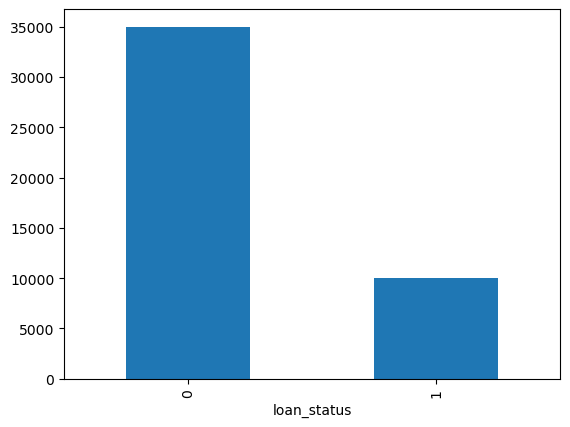

In [344]:
# bar plot to visualize the frequency
loan_data_ordinal['loan_status'].value_counts().plot.bar()

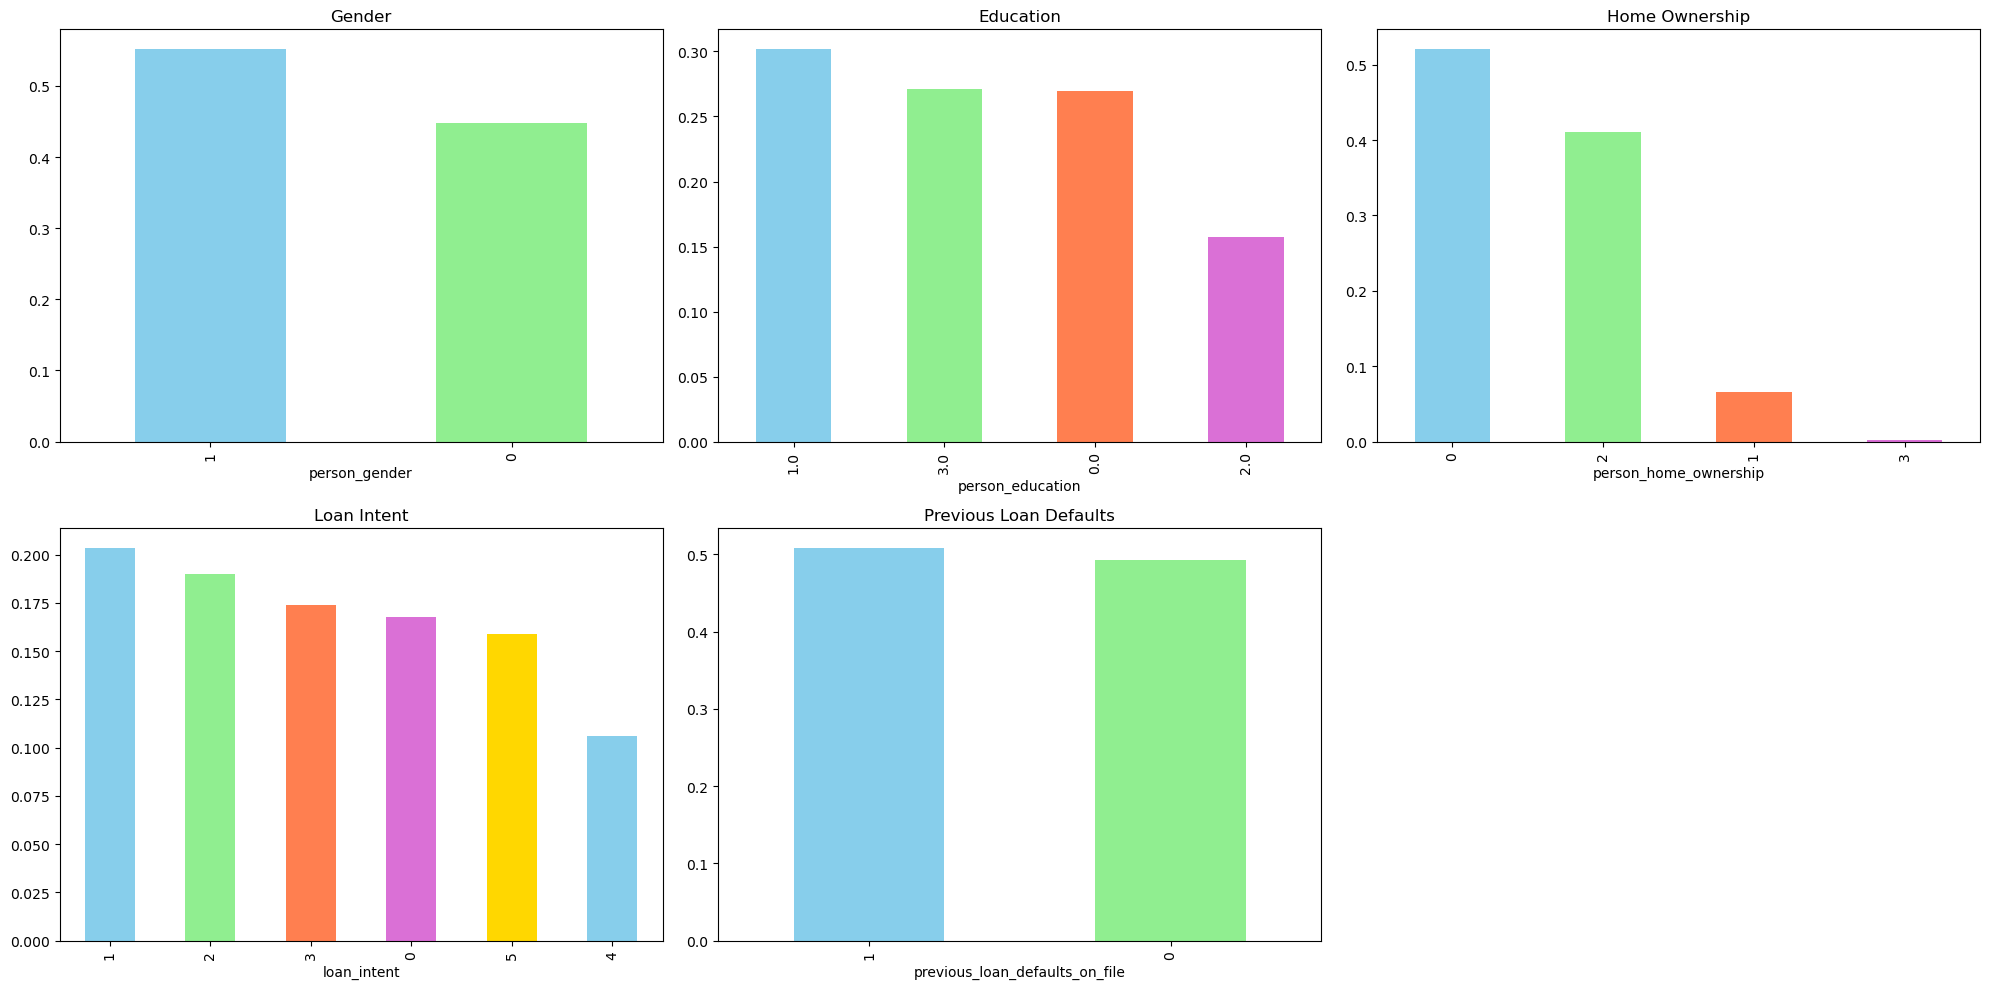

In [376]:
plt.figure(figsize=(20, 10))  # Set the figure size

# Define a list of colors to cycle through
colors = ['skyblue', 'lightgreen', 'coral', 'orchid', 'gold']

plt.subplot(231)
loan_data_ordinal['person_gender'].value_counts(normalize=True).plot.bar(color=colors, title='Gender')

plt.subplot(232)
loan_data_ordinal['person_education'].value_counts(normalize=True).plot.bar(color=colors, title='Education')

plt.subplot(233)
loan_data_ordinal['person_home_ownership'].value_counts(normalize=True).plot.bar(color=colors, title='Home Ownership')

plt.subplot(234)
loan_data_ordinal['loan_intent'].value_counts(normalize=True).plot.bar(color=colors, title='Loan Intent')

plt.subplot(235)
loan_data_ordinal['previous_loan_defaults_on_file'].value_counts(normalize=True).plot.bar(color=colors, title='Previous Loan Defaults')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

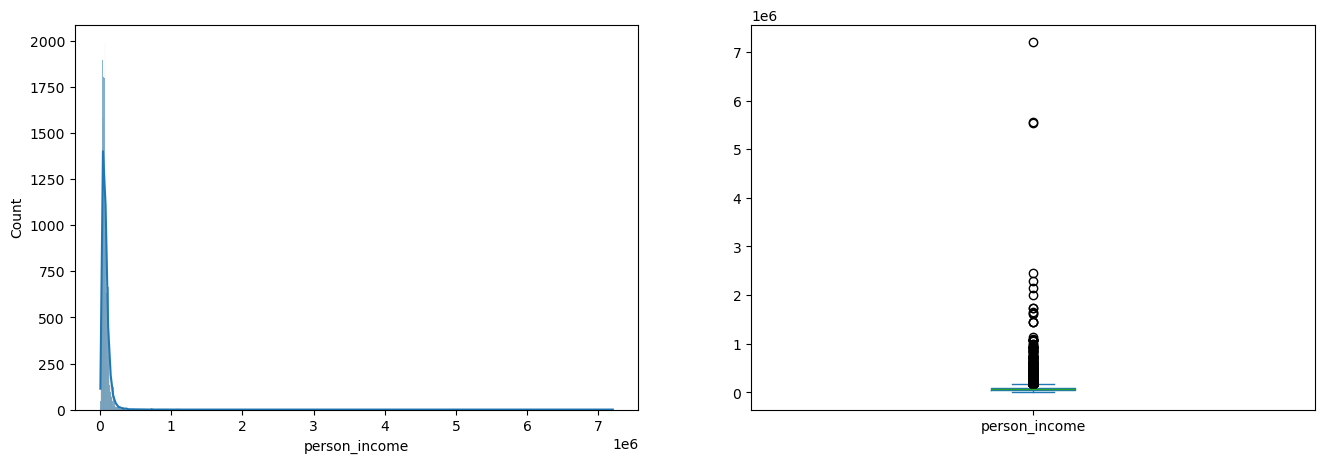

In [378]:
# Set up the plot figure size
plt.figure(figsize=(20, 8))

# Visualizing ApplicantIncome with histplot
plt.subplot(121)
sns.histplot(loan_data_ordinal['person_income'], kde=True) 
# Added kde for smoother curve

# Visualizing ApplicantIncome with boxplot
plt.subplot(122)
loan_data_ordinal['person_income'].plot.box(figsize=(16,5))

plt.show()


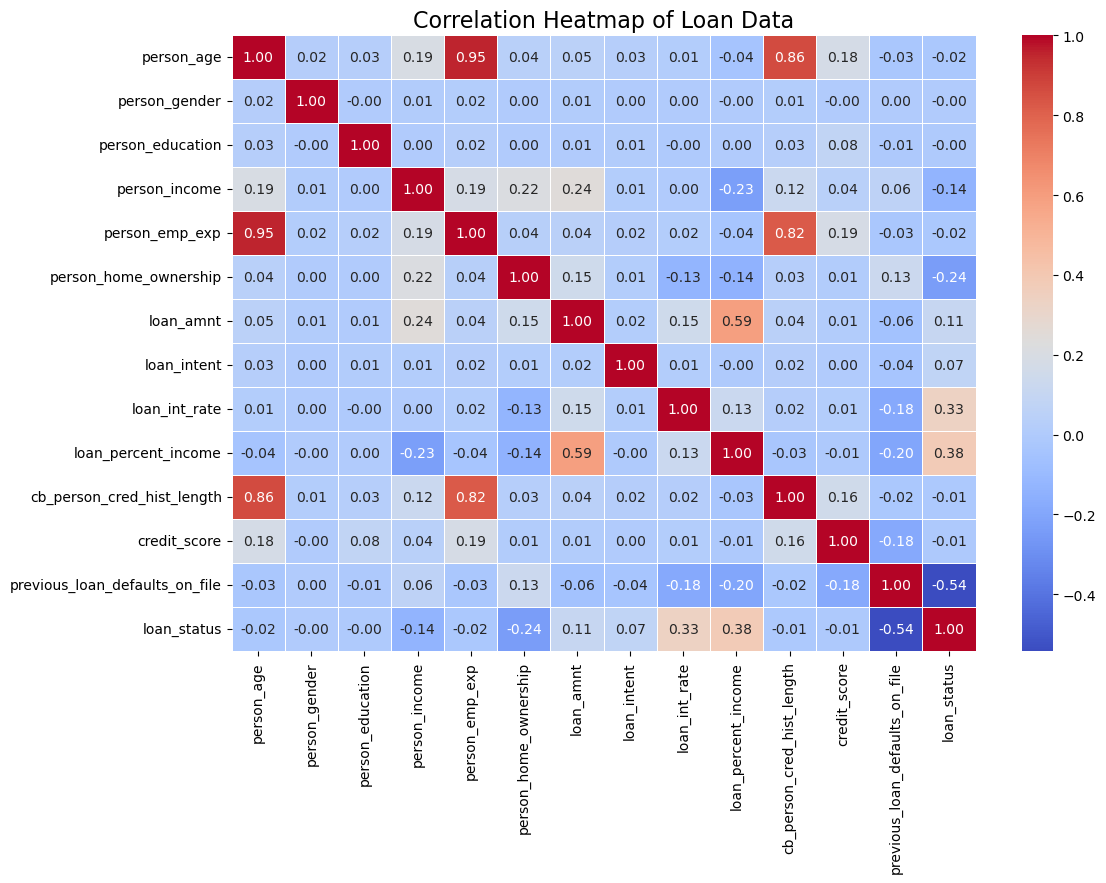

In [380]:
correlation_matrix = loan_data_ordinal.corr()

plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    cbar=True
)

# Add title
plt.title("Correlation Heatmap of Loan Data", fontsize=16)

# Show the plot
plt.show()


## Splitting of Data

In [346]:
from sklearn.model_selection import train_test_split

# Assuming 'loan_data_ordinal' is the dataset after encoding and cleaning

# Define the features (X) and target (y)
X = loan_data_ordinal.drop(columns=['loan_status'])  
y = loan_data_ordinal['loan_status'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)



Training set features shape: (36000, 13)
Testing set features shape: (9000, 13)


## SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous features)

In [348]:
from imblearn.over_sampling import SMOTENC
import numpy as np

# Define categorical features (use column indices or column names)
categorical_features = [
    'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'
]

categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

# Initialize SMOTENC
smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# Apply SMOTENC on the training data
X_train_res, y_train_res = smotenc.fit_resample(X_train, y_train)

# Display the shape of the resampled dataset
print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_res.shape)

Original training set shape: (36000, 13)
Resampled training set shape: (56020, 13)


In [349]:
import pandas as pd

# Convert resampled dataset to DataFrame
X_train_res_df = pd.DataFrame(X_train_res, columns=X_train.columns)
y_train_res_df = pd.DataFrame(y_train_res, columns=['loan_status'])
X_train_res=X_train_res_df
Y_train_res=y_train_res_df

X_train_res.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,34,0,1.0,97265,11,2,15000,0,12.73,0.15,9,631,0
1,25,1,0.0,72953,3,0,12000,3,11.86,0.16,4,659,1
2,41,0,2.0,322597,18,2,24000,0,10.37,0.07,11,683,1
3,27,1,3.0,94232,4,0,9600,1,17.14,0.10,7,641,0
4,27,1,2.0,84873,7,0,7059,4,12.97,0.08,3,706,1


In [350]:
y_train_res.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: loan_status, dtype: int64

## Training Model

### Logistic Regression

In [388]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Handle missing values by replacing NaN with the mean
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(solver='saga', max_iter=2000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

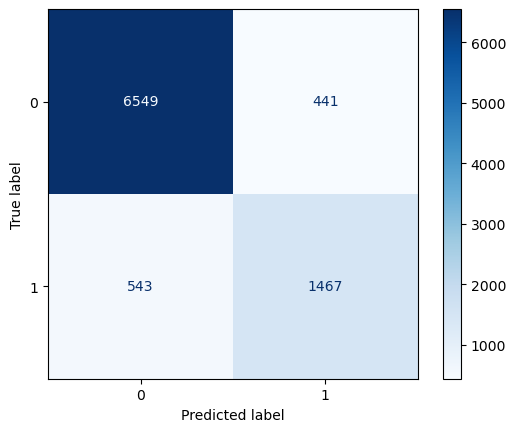

In [390]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues")

# Show the plot
plt.show()

In [392]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # For binary classification
roc_auc = roc_auc_score(y_test, y_pred)  # Ensure y_test is binary (0 or 1)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.8907
F1 Score: 0.7489
ROC-AUC Score: 0.8334


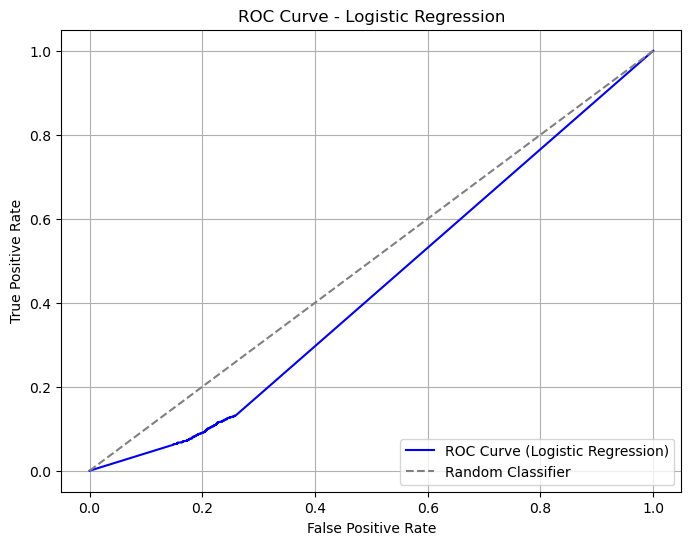

In [394]:
from sklearn.metrics import roc_curve

# Ensure y_test is a 1D array
y_test = np.ravel(y_test)  

# Handle missing values in X_test (if any)
X_test = X_test.fillna(X_test.mean())  # Replace NaNs with column mean

# Convert X_test to a NumPy array to prevent feature name mismatch warning
y_pred_prob = log_reg.predict_proba(X_test.to_numpy())[:, 1]  

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (Logistic Regression)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)  # Add grid for better readability
plt.show()

### Decision Tree Regression

In [397]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)  

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

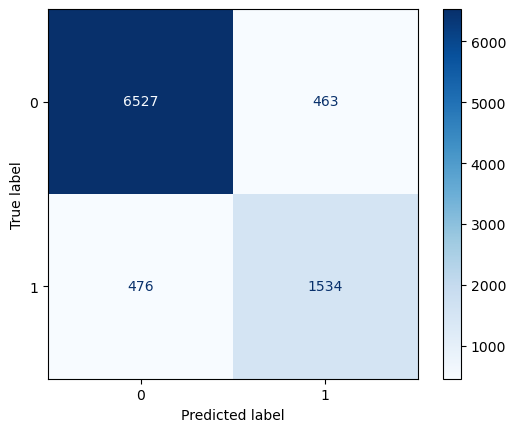

In [399]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues")

plt.show()

In [401]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.8957
F1 Score: 0.7657
ROC-AUC Score: 0.8485


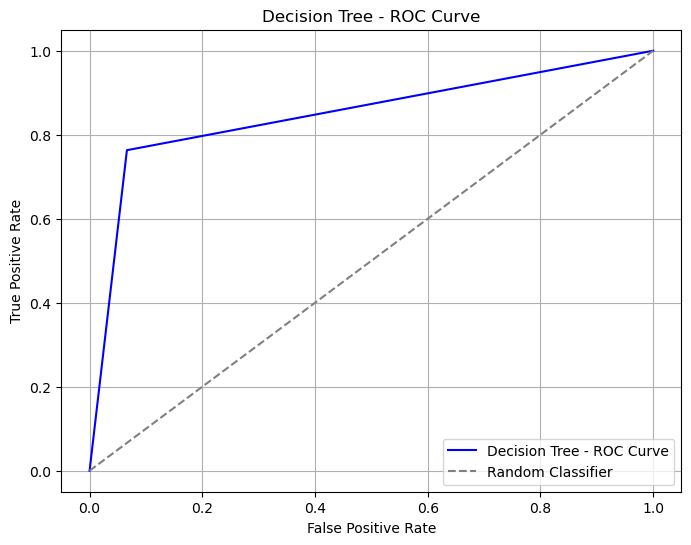

In [403]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]  # Ensure correct model name

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Decision Tree - ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)  # Improve readability
plt.show()

### Random Forest

In [405]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  # Probability for ROC curve

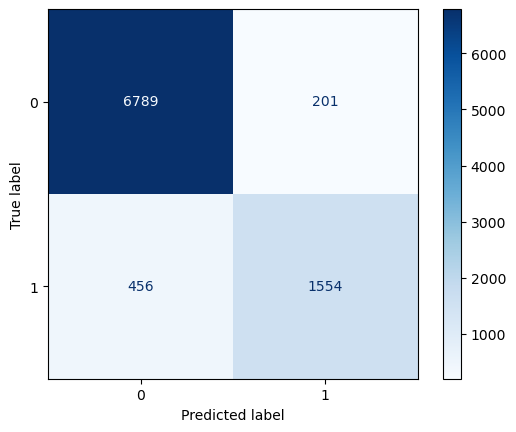

In [408]:
# Confusion matrix visualization
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(conf_matrix_rf)
disp.plot(cmap="Blues")

plt.show()


In [410]:
# Compute performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print metrics
print(f" Accuracy: {accuracy_rf:.4f}")
print(f" F1 Score: {f1_rf:.4f}")
print(f" ROC-AUC Score: {roc_auc_rf:.4f}")

 Accuracy: 0.9270
 F1 Score: 0.8255
 ROC-AUC Score: 0.9731


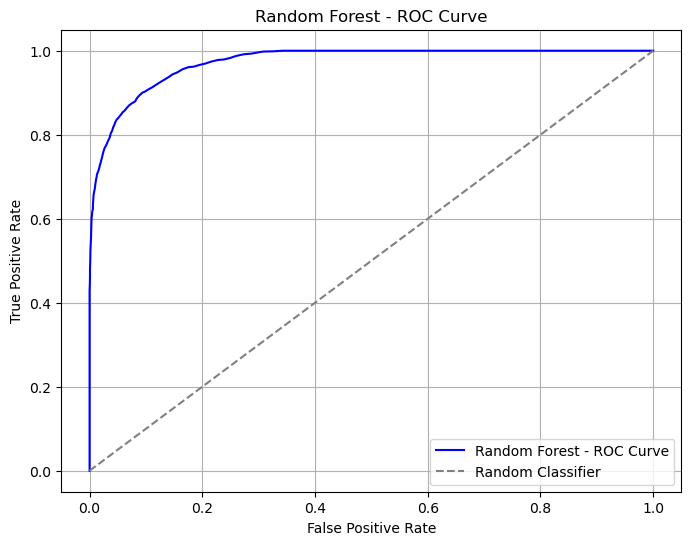

In [412]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest - ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### XGBoost

In [351]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)
y_prob_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

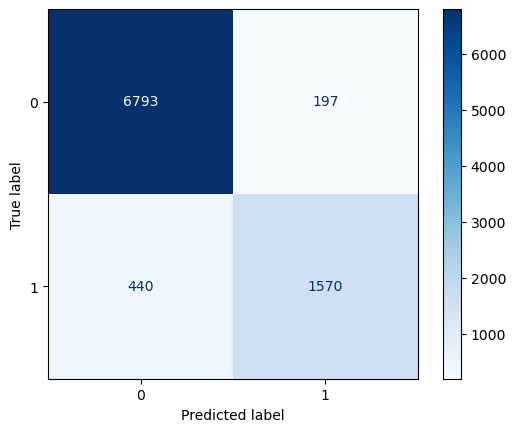

In [414]:
# Confusion matrix visualization
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(conf_matrix_xgb)
disp.plot(cmap="Blues")

plt.show()

In [352]:
# Compute performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Print results
print(f" Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"ROC-AUC Score: {roc_auc_xgb:.4f}")


 Accuracy: 0.9292
F1 Score: 0.8313
ROC-AUC Score: 0.9754


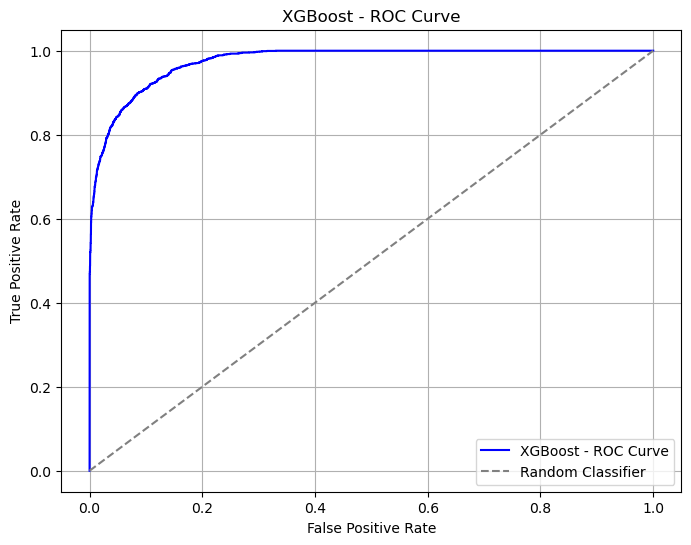

In [416]:
# Compute ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label='XGBoost - ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Hyperparameter Tuning

In [353]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],  
    'subsample': [0.7, 0.8, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0]  
}

# Initialize the XGBoost classifier (Remove use_label_encoder)
xgb_classifier = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate performance
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

# Print results
print(f"Best XGBoost Accuracy: {accuracy_sbest_xgb:.4f}")
print(f"Best XGBoost F1 Score: {f1_best_xgb:.4f}")
print(f"Best XGBoost ROC-AUC Score: {roc_auc_best_xgb:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Accuracy: 0.9338611111111111
Best XGBoost Accuracy: 0.9354
Best XGBoost F1 Score: 0.8475
Best XGBoost ROC-AUC Score: 0.9781


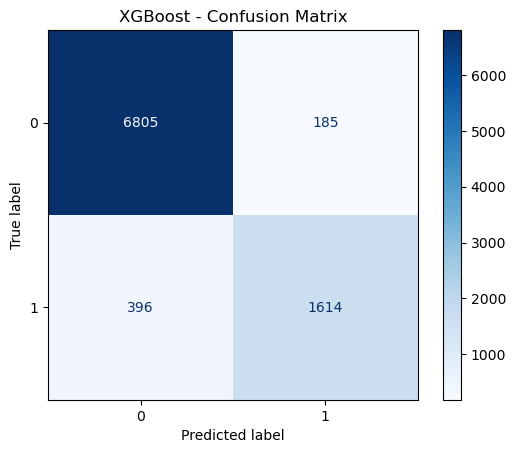

In [419]:
# 🔹 Confusion Matrix Visualization
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)
disp = ConfusionMatrixDisplay(conf_matrix_xgb)
disp.plot(cmap="Blues")

plt.title("XGBoost - Confusion Matrix")
plt.show()

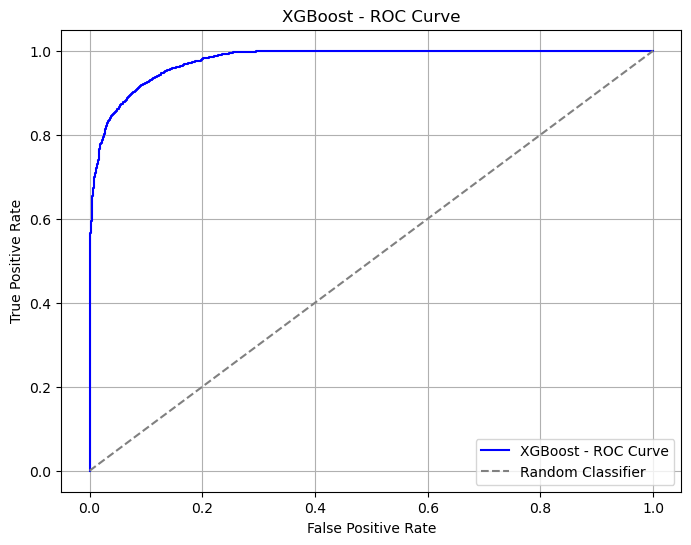

In [421]:

# Make predictions
y_pred_best_xgb = best_xgb.predict(X_test)
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]  # Extract probability scores

# 🔹 ROC-AUC Curve
from sklearn.metrics import roc_curve

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_best_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label='XGBoost - ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SHAP Analysis

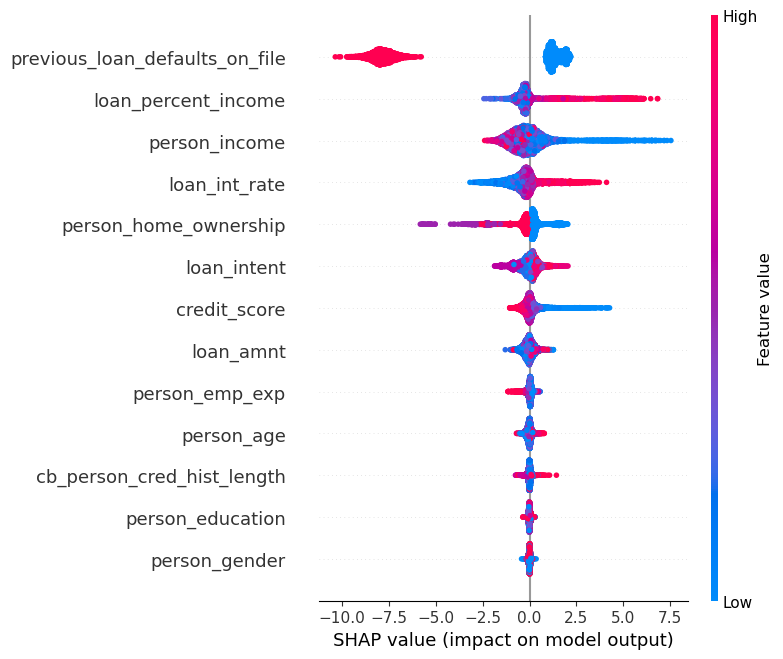

In [428]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Ensure the model is trained
xgb_classifier.fit(X_train, y_train)  

# Use TreeExplainer for XGBoost models
explainer = shap.TreeExplainer(xgb_classifier)  

# Compute SHAP values
shap_values = explainer.shap_values(X_test)  

# Summary plot
shap.summary_plot(shap_values, X_test)

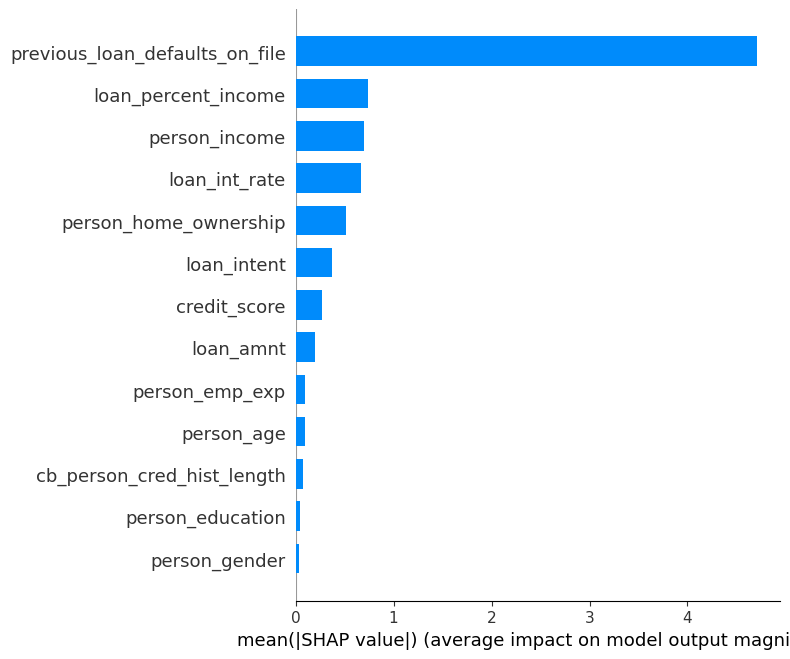

In [430]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Save the model

In [354]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb, "xgboost_model.pkl")

print("XGBoost model saved successfully!")

XGBoost model saved successfully!


### Manual Testing

In [368]:
import pandas as pd

sample_data = {
    "person_age": [21],
    "person_gender": [1],  # 0 = male, 1 = female
    "person_education": [0],  # 0 = High School, 1 = Bachelor, 2 = Master, etc.
    "person_income": [12282],
    "person_emp_exp": [0],
    "person_home_ownership": [1],  # 0 = Rent, 1 = Own, 2 = Mortgage
    "loan_amnt": [1000],
    "loan_intent": [1],  # 0 = Personal, 1 = Education, 2 = Medical, etc.
    "loan_int_rate": [11.14],
    "loan_percent_income": [0.08],
    "cb_person_cred_hist_length": [2],
    "credit_score": [504],
    "previous_loan_defaults_on_file": [1],  # 0 = No, 1 = Yes
}


# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# Make predictions on the sample data
sample_predictions = best_xgb.predict(sample_df)

# Display the predictions
print("Predictions for the sample data:", sample_predictions)


Predictions for the sample data: [0]
